#Descion Tree to predict if home market in area is hot or cold

In [ ]:
folder_path = "./"
file_name = "singlefamilyhome_time_city.csv"


In [ ]:
%pip install scikit-learn 1.6
%pip install pandas

In [7]:
%pip install --pre --extra-index https://pypi.anaconda.org/scientific-python-nightly-wheels/simple scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.anaconda.org/scientific-python-nightly-wheels/simple
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Canon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas
from sklearn.preprocessing import LabelEncoder


In [7]:
home_data = pandas.read_csv("metro_heat_index.csv")
print(home_data)

     RegionID  SizeRank       RegionName RegionType StateName  2018-01-31  \
0      102001         0    United States    country       NaN        49.0   
1      394913         1     New York, NY        msa        NY        53.0   
2      753899         2  Los Angeles, CA        msa        CA        68.0   
3      394463         3      Chicago, IL        msa        IL        48.0   
4      394514         4       Dallas, TX        msa        TX        55.0   
..        ...       ...              ...        ...       ...         ...   
923    753929       935       Zapata, TX        msa        TX         NaN   
924    394743       936    Ketchikan, AK        msa        AK        38.0   
925    753874       937        Craig, CO        msa        CO         6.0   
926    395188       938       Vernon, TX        msa        TX        51.0   
927    394767       939       Lamesa, TX        msa        TX        46.0   

     2018-02-28  2018-03-31  2018-04-30  2018-05-31  ...  2023-12-31  \
0  

In [ ]:
# Features
# RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName
# Target
# 2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31, ...
#6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,245291.08005117264,246606.23387442427,247971.2943357786,250526.64939858264,

#training_features = ["RegionID", "SizeRank", "RegionName", "RegionType", "StateName", "State", "Metro", "CountyName"]
#string_features = ["RegionName", "RegionType", "StateName", "State", "Metro", "CountyName"]
#print(home_data)


       # = le.fit_transform(home_data[feature][i])
    

#print(home_data)


In [9]:
# dictionary to store region name to its ID
print(home_data["StateName"])

0      NaN
1       NY
2       CA
3       IL
4       TX
      ... 
923     TX
924     AK
925     CO
926     TX
927     TX
Name: StateName, Length: 928, dtype: object


In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


# Assuming home_data is already defined and loaded as a DataFrame
# Example:
# home_data = pd.read_csv('your_data.csv')

# Features
features = home_data[["RegionID", "SizeRank", "StateName"]]
state_to_number = {}

#encode each state to 0-49, without repeating

for i in range(len(features['StateName'])):
    if features['StateName'][i] not in state_to_number:
        
        state_to_number[features['StateName'][i]] = len(state_to_number)
    features['StateName'][i] = state_to_number[features['StateName'][i]]

#print(features['StateName'])
#print(features)

# Target = Date Values
target = home_data.iloc[:, 5:]
#remove nan values
combined = features.join(target).dropna()
features_cleaned = combined[features.columns]
target_cleaned = combined[target.columns]



print(target)






C:\Users\Canon\AppData\Local\Temp\ipykernel_17928\718472998.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  features['StateName'][i] = state_to_number[features['StateName'][i]]
C:\Users\Canon\AppData\Local\Temp\ipykernel_17928\718472998

     2018-01-31  2018-02-28  2018-03-31  2018-04-30  2018-05-31  2018-06-30  \
0          49.0        50.0        52.0        54.0        55.0        53.0   
1          53.0        52.0        55.0        57.0        56.0        52.0   
2          68.0        65.0        65.0        66.0        65.0        63.0   
3          48.0        49.0        51.0        52.0        50.0        48.0   
4          55.0        55.0        58.0        60.0        59.0        55.0   
..          ...         ...         ...         ...         ...         ...   
923         NaN         NaN         NaN         NaN         NaN         NaN   
924        38.0        36.0        36.0        38.0        49.0        63.0   
925         6.0        26.0        54.0        68.0        58.0        41.0   
926        51.0        44.0         NaN        48.0        65.0        58.0   
927        46.0        45.0        43.0        49.0        50.0        56.0   

     2018-07-31  2018-08-31  2018-09-30  2018-10-31

C:\Users\Canon\AppData\Local\Temp\ipykernel_17928\718472998.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['StateName'][i] = state_to_number[features['StateName'][i]]


[Text(0.6760818894340987, 0.9791666666666666, 'StateName <= 49.5\ngini = 0.979\nsamples = 723\nvalue = [[1.0, 1.0, 1.0 ... 0.0, 0.0, 0.0]\n[1.0, 1.0, 1.0 ... 0.0, 0.0, 0.0]\n[1.0, 1.0, 2.0 ... 0.0, 0.0, 0.0]\n...\n[1.0, 1.0, 1.0 ... 0.0, 0.0, 0.0]\n[1.0, 1.0, 2.0 ... 0.0, 0.0, 0.0]\n[1.0, 2.0, 1.0 ... 0.0, 0.0, 0.0]]'),
 Text(0.4222520355328598, 0.9375, 'SizeRank <= 280.5\ngini = 0.979\nsamples = 715\nvalue = [[1.0, 1.0, 1.0 ... 0.0, 0.0, 0.0]\n[1.0, 1.0, 1.0 ... 0.0, 0.0, 0.0]\n[1.0, 1.0, 2.0 ... 0.0, 0.0, 0.0]\n...\n[1.0, 1.0, 1.0 ... 0.0, 0.0, 0.0]\n[1.0, 1.0, 2.0 ... 0.0, 0.0, 0.0]\n[1.0, 2.0, 1.0 ... 0.0, 0.0, 0.0]]'),
 Text(0.5491669624834793, 0.9583333333333333, 'True  '),
 Text(0.10276483263178994, 0.8958333333333334, 'StateName <= 2.5\ngini = 0.972\nsamples = 270\nvalue = [[0, 0, 0 ... 0, 0, 0]\n[0, 0, 0 ... 0, 0, 0]\n[0, 0, 1 ... 0, 0, 0]\n...\n[0, 0, 0 ... 0, 0, 0]\n[0, 0, 0 ... 0, 0, 0]\n[0, 0, 0 ... 0, 0, 0]]'),
 Text(0.022770094207255964, 0.8541666666666666, 'SizeRank <= 

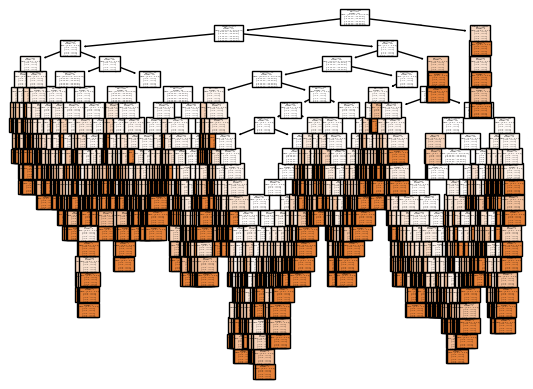

In [25]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Drop rows with missing values in both features and target


dtree = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = None, min_samples_split = 2, min_samples_leaf = 1)
dtree.fit(features_cleaned, target_cleaned)

# Plot the decision tree

tree.plot_tree(dtree, feature_names = features.columns, class_names = target.columns, filled = True)

In [ ]:
#print(dtree.predict[]

[[49. 50. 52. ... 55. 53. 52.]
 [53. 52. 55. ... 76. 76. 74.]
 [68. 65. 65. ... 67. 64. 63.]
 ...
 [38. 39. 41. ... 39. 37. 31.]
 [48. 49. 51. ... 46. 44. 44.]
 [ 6. 26. 54. ... 36. 25. 22.]]
